In [1]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import os
import matplotlib.pyplot as plt
import torch.nn.functional as F
%matplotlib inline
import random
import torchvision
import torchvision.transforms as transforms
import numpy as np
from torchvision import models
import matplotlib.pyplot as plt


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device available now:', device)

image_transforms = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
train = torchvision.datasets.CIFAR10(root='./', train=True, download=True, transform=image_transforms)
test = torchvision.datasets.CIFAR10(root='./', train=False, transform=image_transforms)

listsubtrain = list(range(0, len(train), 500))

listest = list(range(1, len(test), 20))
trainset_1 = torch.utils.data.Subset(train, listsubtrain)
trainset_2 = torch.utils.data.Subset(test, listest)



traindata = torch.utils.data.DataLoader(trainset_1,batch_size=20, shuffle=True, num_workers=2,pin_memory=True)

testdata = torch.utils.data.DataLoader(trainset_2,batch_size=5, shuffle=False, num_workers=2,pin_memory=True)

transform_inception = transforms.Resize((299,299))


model = models.inception_v3(pretrained=True)
model.aux_logits = False
if torch.cuda.is_available():
    model.cuda()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01, weight_decay = 0.005, momentum = 0.9)
criterion = nn.CrossEntropyLoss().to(device)
def train_test(epochs):
 list_acc = 0
 for i in range(epochs):
  Loss = 0
  num_correct=0
  tot = 0
  model.train()
  for i,data in enumerate(traindata):
    # iterating through every batch
    x_data = data[0].to(device)
    labels = data[1].to(device)
    optimizer.zero_grad()
    outputs = model(x_data)
    # pred[i] = outputs.argmax(dim=1)
    # act[i] = labels.argmax(dim=1)
    _, pred = torch.max(outputs.data, 1)
    num_correct += (pred == labels).sum().item()
    tot += labels.size(0)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    Loss += loss
    #print(loss)
  list_acc += num_correct/tot
  #print(list_acc)

 num_correct = 0
 tot = 0
 for i,data in enumerate(testdata):
    x_data = data[0].to(device)
    labels = data[1].to(device)
    outputs = model(x_data)
   
    _, pred = torch.max(outputs.data, 1)
    num_correct += (pred == labels).sum().item()
    tot += labels.size(0)
 return (num_correct)/tot , list_acc/epochs

Device available now: cuda


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to ./


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth


  0%|          | 0.00/104M [00:00<?, ?B/s]

In [2]:

list_x = [i+1 for i in range(30)]
list_test = []
list_train = []
for i in list_x:
  a,b = train_test(i)
  print(a,b)
  list_test.append(a)
  list_train.append(b)



0.19 0.06
0.338 0.54
0.28 0.83
0.268 0.97
0.32 0.968
0.286 0.96
0.324 0.9842857142857143
0.34 0.9975
0.332 1.0
0.328 0.998
0.34 1.0
0.354 1.0
0.37 1.0
0.36 1.0
0.37 1.0
0.384 1.0
0.376 1.0
0.37 1.0
0.392 1.0
0.382 1.0
0.376 1.0
0.376 1.0
0.392 1.0
0.382 1.0
0.394 1.0
0.276 0.9384615384615385
0.274 0.9796296296296293
0.326 0.9996428571428572
0.346 1.0
0.348 1.0


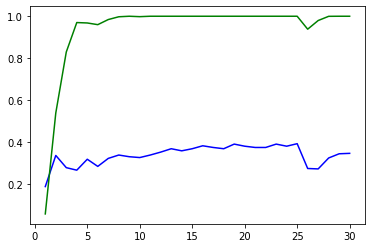

In [3]:
plt.plot(list_x,list_test,color = 'blue')

plt.plot(list_x,list_train,color = 'green')

plt.show()

In [4]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import os
import matplotlib.pyplot as plt
import torch.nn.functional as F
%matplotlib inline
import random
import torchvision
import torchvision.transforms as transforms
import numpy as np
from torchvision import models
import matplotlib.pyplot as plt
batchsize = 256
rowsize = 28
colsize = 28
inchannels = 3
kernelsize = 5
stride = 1
padding = 0
poolsize = 3
fc_size1 = 384
fc_size2 = 192
no_classes = 10

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device available now:', device)

image_transforms = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
train = torchvision.datasets.CIFAR10(root='./', train=True, download=True, transform=image_transforms)
listsubtrain = list(range(0, len(train), 500))
test = torchvision.datasets.CIFAR10(root='./', train=False, transform=image_transforms)
listest = list(range(1, len(test), 20))
trainset_1 = torch.utils.data.Subset(train, listsubtrain)
trainset_2 = torch.utils.data.Subset(test, listest)



traindata = torch.utils.data.DataLoader(trainset_1,batch_size=20, shuffle=True, num_workers=2,pin_memory=True)

testdata = torch.utils.data.DataLoader(trainset_2,batch_size=5, shuffle=False, num_workers=2,pin_memory=True)

transform_inception = transforms.Resize((299,299))


model = models.inception_v3(pretrained=True)
model.aux_logits = False
if torch.cuda.is_available():
    model.cuda()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01, weight_decay = 0.005, momentum = 0.9)
criterion = nn.CrossEntropyLoss().to(device)
def train_test(epochs):
 list_acc = 0
 for i in range(epochs):
  Loss = 0
  num_correct=0
  tot = 0
  model.train()
  for i,data in enumerate(traindata):
    x_data = data[0].to(device)
    labels = data[1].to(device)
    optimizer.zero_grad()
    outputs = model(x_data)
    _, pred = torch.max(outputs.data, 1)
    num_correct += (pred == labels).sum().item()
    tot += labels.size(0)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    Loss += loss
    
  list_acc += num_correct/tot
 

 num_correct = 0
 tot = 0
 for i,data in enumerate(testdata):
    x_data = data[0].to(device)
    labels = data[1].to(device)
    outputs = model(x_data)
   
    _, pred = torch.max(outputs.data, 1)
    num_correct += (pred == labels).sum().item()
    tot += labels.size(0)
 return (num_correct)/tot , list_acc/epochs

Device available now: cuda
Files already downloaded and verified


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
list_x = [i+1 for i in range(30)]
list_test_nob = []
list_train_nob = []
for i in list_x:
  a,b = train_test(i)
  print(a,b)
  list_test.append(a)
  list_train.append(b)

0.21 0.07
0.304 0.5700000000000001
0.294 0.8266666666666667
0.318 0.9249999999999999
0.32 0.968
0.354 0.9933333333333335
0.348 0.9799999999999999
0.33 0.98875
0.322 0.991111111111111
0.344 0.9959999999999999
0.338 0.9990909090909091
0.33 1.0
0.328 1.0
0.348 1.0
0.356 1.0
0.358 1.0
0.368 1.0
0.354 1.0
0.362 1.0
0.372 1.0
0.372 1.0
0.394 1.0
0.328 0.9934782608695651
0.3 0.9745833333333334
0.314 0.9739999999999998
0.314 0.9949999999999999
0.346 0.9996296296296298
0.352 1.0
0.358 1.0
0.362 1.0


0.21


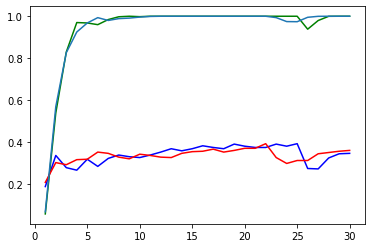

In [6]:
print(list_test[30])
list_test_nob = [list_test[i] for i in range(30,60)]
list_train_nob = [list_train[i] for i in range(30,60)]
plt.plot(list_x,list_test[0:30],color = 'blue')

plt.plot(list_x,list_train[0:30],color = 'green')


plt.plot(list_x,list_test_nob,color = 'red')
plt.plot(list_x,list_train_nob)
plt.show()